## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings


## Data preparation

In [2]:
clean_df = pd.read_csv('../data/processed/video_data_processed.csv')

In [3]:
clean_df.sample(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,hour,day,day_of_week,month,year
59665,-xAeqi_2cis,James Briggs,NEW Hugging Face Agents — First Look,Hugging Face has announced its take on Large L...,python|machine learning|artificial intelligenc...,2023-05-13 14:30:00+00:00,52399,1160,73,1111,hd,False,14,13,5,5,2023
5838,_tgB-ri9-8c,ritvikmath,Time Series Talk : Moving Average and ACF,How to find the order of your Moving Average M...,time series|machine learning|data science,2019-04-23 00:14:27+00:00,83349,1233,59,542,hd,False,0,23,1,4,2019
20574,MIWSQmv0dXQ,Serrano.Academy,You are much better at math than you think,"In this video, we see two math problems that r...",(notag),2020-04-20 14:36:32+00:00,6866,422,31,636,hd,False,14,20,0,4,2020
34613,F-5bS7eO1LU,Codanics,Pandas tips and tricks for Data Science-(Part-2),#pythonkachilla2 #python #datascience \n\n✅ Th...,python|pythonkachilla|python ka chilla|python ...,2022-07-24 10:57:24+00:00,2700,207,302,1154,hd,False,10,24,6,7,2022
34876,IuPdBTCFo6U,Trouble- Free,"5. Finding Rank Of A Matrix - Methods, Determi...",Abroad Education Channel :\nhttps://www.youtub...,btech|m1|jntuh,2022-03-13 08:59:39+00:00,448,10,4,559,hd,False,8,13,6,3,2022


## Feature engineering

In [4]:
X = clean_df[['likeCount', 'commentCount', 'hour', 'day', 'month', 'year']]
# Tạo cột nhãn, ví dụ: nếu viewCount lớn hơn một ngưỡng nào đó, coi video đó là phổ biến
threshold_viewCount = clean_df['viewCount'].quantile(0.7)
clean_df['isTrending'] = (clean_df['viewCount'] > threshold_viewCount).astype(int)
y = clean_df['isTrending']

In [5]:
clean_df.sample(5)


,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,commentCount,duration,definition,caption,hour,day,day_of_week,month,year,isTrending
7060,BAoV5_qVKco,codebasics,Python Tutorial - 2. Variables,"In this Python tutorial, we will learn about v...",python|python tutorial|python for beginners|le...,2015-12-20 02:11:10+00:00,42516,334,24,285,hd,False,2,20,6,12,2015,1
10953,CFW8Rsn0LfY,Analytics Vidhya,Check if Prime Number | Python Tutorial for Be...,This is a very common question asked in the in...,analytics vidhya|data science analytics vidhya...,2023-11-17 05:30:03+00:00,311,7,1,103,hd,True,5,17,4,11,2023,0
48513,94r9cASfV-A,Data Council,Data Driven Growth at Airbnb by Mike Curtis,Data Driven Growth at Airbnb by Mike Curtis - ...,Data Driven Growth,2013-11-11 17:40:49+00:00,1682,10,0,3437,hd,False,17,11,0,11,2013,0
45172,ahaTme0YyKA,Jovian,Side projects that got you Hooked on Software ...,"💻 For real-time updates on events, connections...",(notag),2023-02-06 15:19:42+00:00,303,13,3,176,hd,False,15,6,0,2,2023,0
2633,txh3TQDwP1g,sentdex,Neural Networks from Scratch - P.9 Introducing...,Introducing the challenge of optimization and ...,python|programming,2021-08-02 22:08:08+00:00,98673,2353,335,853,hd,False,22,2,0,8,2021,1


## Training model

In [6]:
# X_train, X_valid, y_train, y_valid = train_test_split(X, y ,test_size=0.2)
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.3, random_state=2023, stratify=y)
X_test, X_valid, y_test, y_valid = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=2023, stratify=y_tmp)
# model = LogisticRegression(solver = 'liblinear',max_iter=1000)
# model.fit(X_train, y_train)

## Evaluation

In [7]:
# model.score(X_valid,y_valid)

## Prediction

In [8]:
# y_pred = model.predict(X_valid)

In [9]:
# precision_score(y_valid,y_pred), recall_score(y_valid,y_pred)

In [10]:
# print(classification_report(y_valid,y_pred))

##### Decision Tree

In [11]:
# decision_Tree = DecisionTreeRegressor()
# decision_Tree.fit(X_train,y_train)


In [12]:
# decision_Tree.score(X_valid,y_valid)

# TEMP


In [13]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
seed = 2023
models = [
    LinearSVC(random_state=seed, dual=False, max_iter=1000),
    SVC(random_state=seed),
    RandomForestClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed)
]

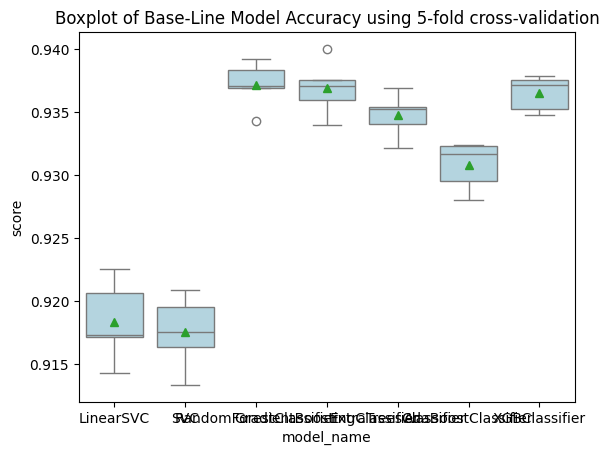

,Mean,Standard Deviation
model_name,,
RandomForestClassifier,0.937176,0.001852
GradientBoostingClassifier,0.936914,0.002219
XGBClassifier,0.936533,0.001398
ExtraTreesClassifier,0.934772,0.001769
AdaBoostClassifier,0.930798,0.001933
LinearSVC,0.918400,0.003212
SVC,0.917543,0.002910


In [14]:
def generate_baseline_result(models, X, y, metrics, cv=5, plot_result=False):
    # define k-fold
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'score'])
    
    mean = cv_df.groupby('model_name')['score'].mean()
    std = cv_df.groupby('model_name')['score'].std()
    
    baseline_results = pd.concat([mean,std],axis =1, ignore_index=True)
    baseline_results.columns =['Mean','Standard Deviation']
    baseline_results.sort_values(by=['Mean'], ascending = False, inplace = True)
    
    if plot_result:
        sns.boxplot(x ='model_name',y = 'score', data = cv_df, color ='lightblue',showmeans=True)
        plt.title('Boxplot of Base-Line Model Accuracy using 5-fold cross-validation')
        plt.show()
    
    return baseline_results

# Metric: https://scikit-learn.org/stable/modules/model_evaluation.html
generate_baseline_result(models, X_train, y_train, metrics='accuracy',cv=5,plot_result =True )

## Fine-tune the model

### RandomForestClassifier

In [15]:
# Define the hyperparameter grid

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=2023),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_valid, y_valid)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

print(f"HyperParameters: {best_params}")


HyperParameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [16]:
# Train the model with the best hyperparameters
warnings.filterwarnings("ignore")

X_train_val = np.concatenate((X_train, X_valid), axis=0)
y_train_val = np.concatenate((y_train, y_valid), axis=0)

best_model = RandomForestClassifier(random_state=2023, **best_params)
best_model.fit(X_train_val, y_train_val)

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")

Best Model Accuracy: 0.9416990560799556


### GradientBoostingClassifier

In [17]:
# Define the hyperparameter grid

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=2023),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_valid, y_valid)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

print(f"HyperParameters: {best_params}")


HyperParameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50, 'subsample': 0.8}


In [18]:
# Train the model with the best hyperparameters
warnings.filterwarnings("ignore")

X_train_val = np.concatenate((X_train, X_valid), axis=0)
y_train_val = np.concatenate((y_train, y_valid), axis=0)

best_model = GradientBoostingClassifier(random_state=2023, **best_params)
best_model.fit(X_train_val, y_train_val)

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")

Best Model Accuracy: 0.9401443642420877


### XGBClassifier

In [ ]:
# Define the hyperparameter grid

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(XGBClassifier(random_state=2023),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_valid, y_valid)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

print(f"HyperParameters: {best_params}")


In [ ]:
# Train the model with the best hyperparameters
warnings.filterwarnings("ignore")

X_train_val = np.concatenate((X_train, X_valid), axis=0)
y_train_val = np.concatenate((y_train, y_valid), axis=0)

best_model = XGBClassifier(random_state=2023, **best_params)
best_model.fit(X_train_val, y_train_val)

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Evaluate the best model
print(f"Best Model Accuracy: {accuracy_score(y_test, y_pred_best)}")